In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [5]:
#loading data
CCA_data=pd.read_csv("Crime_Data.csv")

In [8]:
# Display basic information about the dataset
# Helps understand the structure of the dataset
print("# Displaying basic dataset information")
print(CCA_data.info())
print(CCA_data.head())

# Displaying basic dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549999 entries, 0 to 549998
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    549999 non-null  int64  
 1   Case Number           549999 non-null  object 
 2   Date                  549999 non-null  object 
 3   Block                 549999 non-null  object 
 4   IUCR                  549999 non-null  object 
 5   Primary Type          549999 non-null  object 
 6   Description           549999 non-null  object 
 7   Location Description  548326 non-null  object 
 8   Arrest                549999 non-null  bool   
 9   Domestic              549999 non-null  bool   
 10  Beat                  549999 non-null  int64  
 11  District              549999 non-null  int64  
 12  Ward                  213674 non-null  float64
 13  Community Area        215093 non-null  float64
 14  FBI Code     

In [9]:
print(CCA_data.isnull().sum())

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1673
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    336325
Community Area          334906
FBI Code                     0
X Coordinate              6912
Y Coordinate              6912
Year                         0
Updated On                   0
Latitude                  6912
Longitude                 6912
Location                  6912
dtype: int64


In [10]:
# 1. Filling missing values in 'Location Description' with "Unknown Location"
CCA_data['Location Description'] = CCA_data['Location Description'].fillna("Unknown Location")

# 2. Filling missing values in 'Ward' and 'Community Area'
# Assuming that crimes without Ward or Community Area might be outside proper mapping areas.
# Fill with -1 to indicate "Unknown Ward/Area".
CCA_data['Ward'] = CCA_data['Ward'].fillna(-1)
CCA_data['Community Area'] = CCA_data['Community Area'].fillna(-1)

# 3. Filling missing coordinates (Latitude and Longitude) and Location
# These can be filled with the mean coordinates of the respective 'Community Area' or dataset-wide mean if no community data.
CCA_data['Latitude'] = CCA_data['Latitude'].fillna(CCA_data.groupby('Community Area')['Latitude'].transform('mean'))
CCA_data['Longitude'] = CCA_data['Longitude'].fillna(CCA_data.groupby('Community Area')['Longitude'].transform('mean'))

# Fill remaining NaN coordinates with dataset-wide mean
CCA_data['Latitude'] = CCA_data['Latitude'].fillna(CCA_data['Latitude'].mean())
CCA_data['Longitude'] = CCA_data['Longitude'].fillna(CCA_data['Longitude'].mean())

# Update 'Location' field based on Latitude and Longitude
CCA_data['Location'] = CCA_data.apply(
    lambda row: f"({row['Latitude']}, {row['Longitude']})" 
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']) 
    else "Unknown Location",
    axis=1
)

# 4. Filling missing values in 'X Coordinate' and 'Y Coordinate'
# Similar to Latitude and Longitude, we use mean values grouped by 'Community Area'.
CCA_data['X Coordinate'] = CCA_data['X Coordinate'].fillna(CCA_data.groupby('Community Area')['X Coordinate'].transform('mean'))
CCA_data['Y Coordinate'] = CCA_data['Y Coordinate'].fillna(CCA_data.groupby('Community Area')['Y Coordinate'].transform('mean'))

# Fill remaining NaN coordinates with dataset-wide mean
CCA_data['X Coordinate'] = CCA_data['X Coordinate'].fillna(CCA_data['X Coordinate'].mean())
CCA_data['Y Coordinate'] = CCA_data['Y Coordinate'].fillna(CCA_data['Y Coordinate'].mean())

# Check for any remaining missing values
print(CCA_data.isnull().sum())

# Save the cleaned dataset
CCA_data.to_csv("Cleaned_Crime_Data.csv", index=False)

print("Missing data has been handled, and the cleaned dataset is saved as 'Cleaned_Crime_Data.csv'.")


ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64
Missing data has been handled, and the cleaned dataset is saved as 'Cleaned_Crime_Data.csv'.


In [11]:
import pandas as pd
data= pd.read_csv("Cleaned_Crime_Data.csv")


In [12]:
# General statistics of numerical columns
print(data.describe())

# Check for unique crime types
print("Unique Crime Types:", data['Primary Type'].nunique())
print(data['Primary Type'].value_counts())


                 ID           Beat       District           Ward  \
count  5.499990e+05  549999.000000  549999.000000  549999.000000   
mean   5.748380e+06    1200.364957      11.339984       8.349093   
std    5.669909e+06     712.157469       7.047229      14.573579   
min    6.340000e+02     111.000000       1.000000      -1.000000   
25%    1.477682e+06     621.000000       6.000000      -1.000000   
50%    1.651346e+06    1113.000000      10.000000      -1.000000   
75%    1.327660e+07    1813.000000      17.000000      16.000000   
max    1.348547e+07    2535.000000      31.000000      50.000000   

       Community Area  X Coordinate  Y Coordinate           Year  \
count   549999.000000  5.499990e+05  5.499990e+05  549999.000000   
mean        13.765354  1.164772e+06  1.886966e+06    2009.336524   
std         22.931182  1.886520e+04  3.521602e+04      10.728233   
min         -1.000000  0.000000e+00  0.000000e+00    2001.000000   
25%         -1.000000  1.153722e+06  1.860559e+

In [13]:
# Check for any remaining missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


C:\Users\Hi\AppData\Local\Temp\ipykernel_6540\4181065877.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


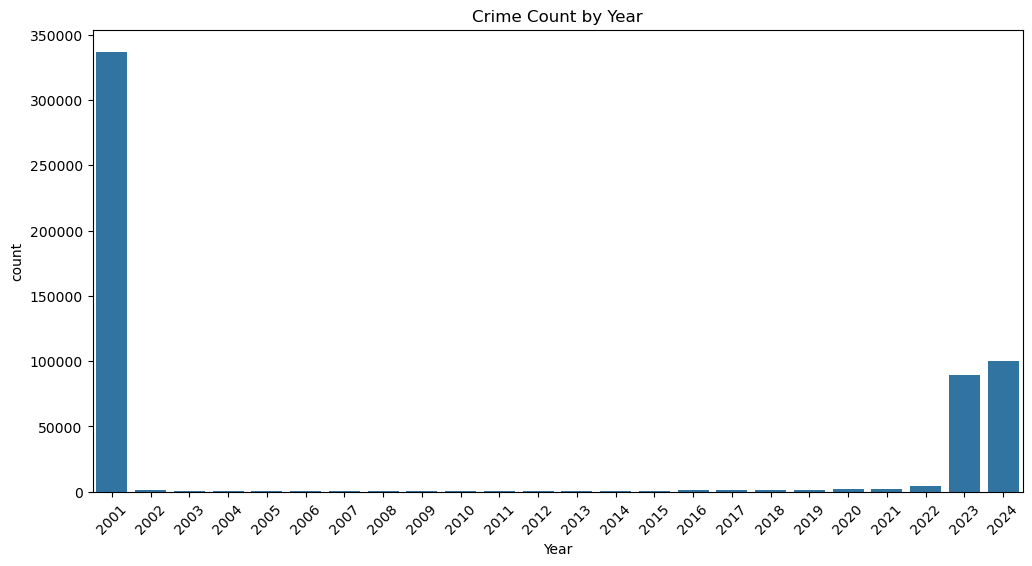

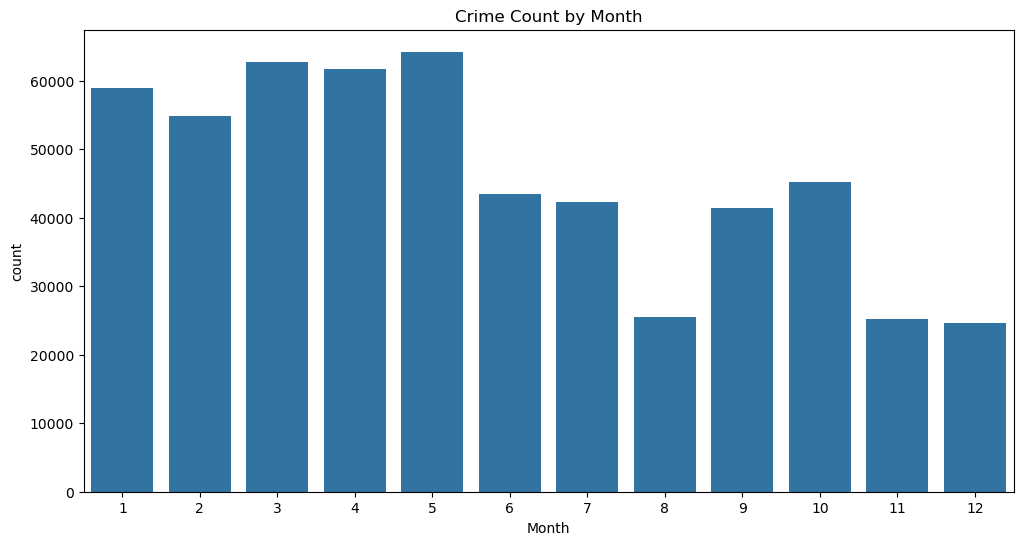

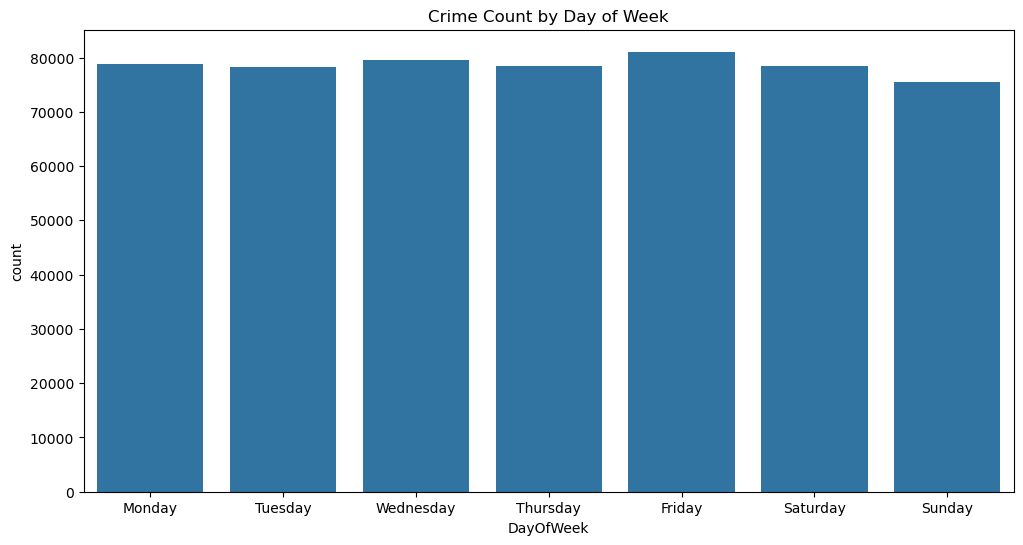

In [14]:
# Convert date column to datetime if not already done
data['Date'] = pd.to_datetime(data['Date'])

# Extract useful time features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = data['Date'].dt.hour
data['DayOfWeek'] = data['Date'].dt.day_name()

# Plotting yearly trends
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Year', order=sorted(data['Year'].unique()))
plt.title("Crime Count by Year")
plt.xticks(rotation=45)
plt.show()

# Monthly trends
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Month')
plt.title("Crime Count by Month")
plt.show()

# Day of Week trends
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Crime Count by Day of Week")
plt.show()


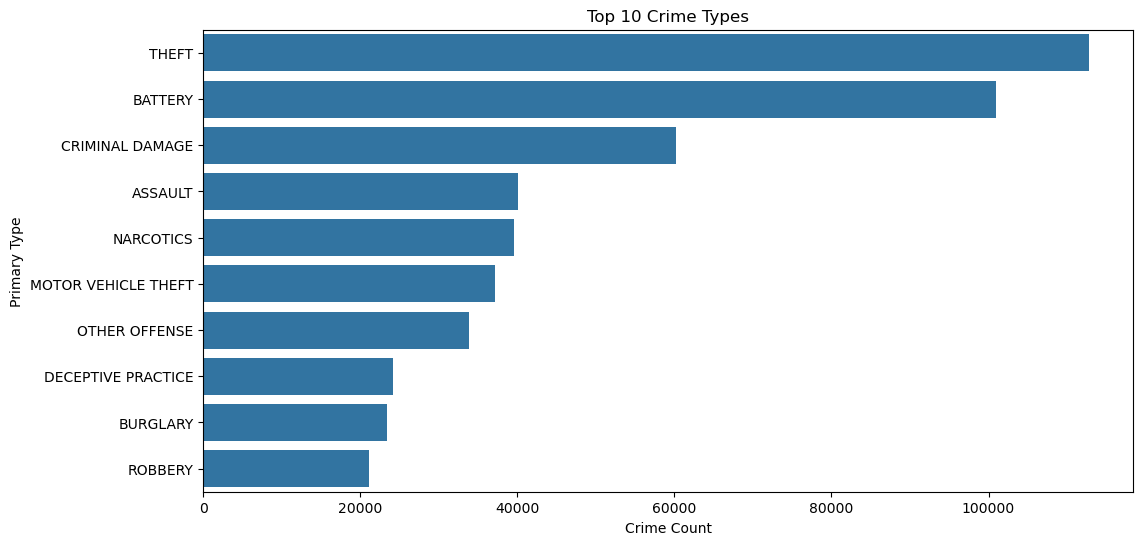

In [15]:
# Crime type distribution
plt.figure(figsize=(12, 6))
crime_counts = data['Primary Type'].value_counts().head(10)  # Top 10 crimes
sns.barplot(x=crime_counts.values, y=crime_counts.index)
plt.title("Top 10 Crime Types")
plt.xlabel("Crime Count")
plt.show()


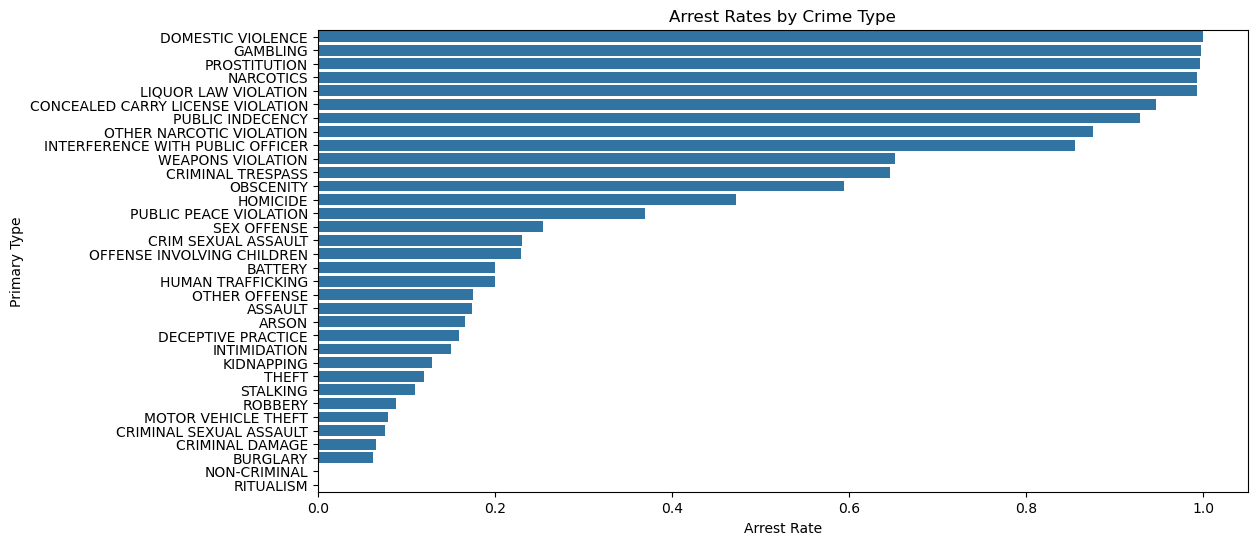

In [16]:
# Arrest rate by crime type
arrest_rate = data.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=arrest_rate.values, y=arrest_rate.index)
plt.title("Arrest Rates by Crime Type")
plt.xlabel("Arrest Rate")
plt.show()


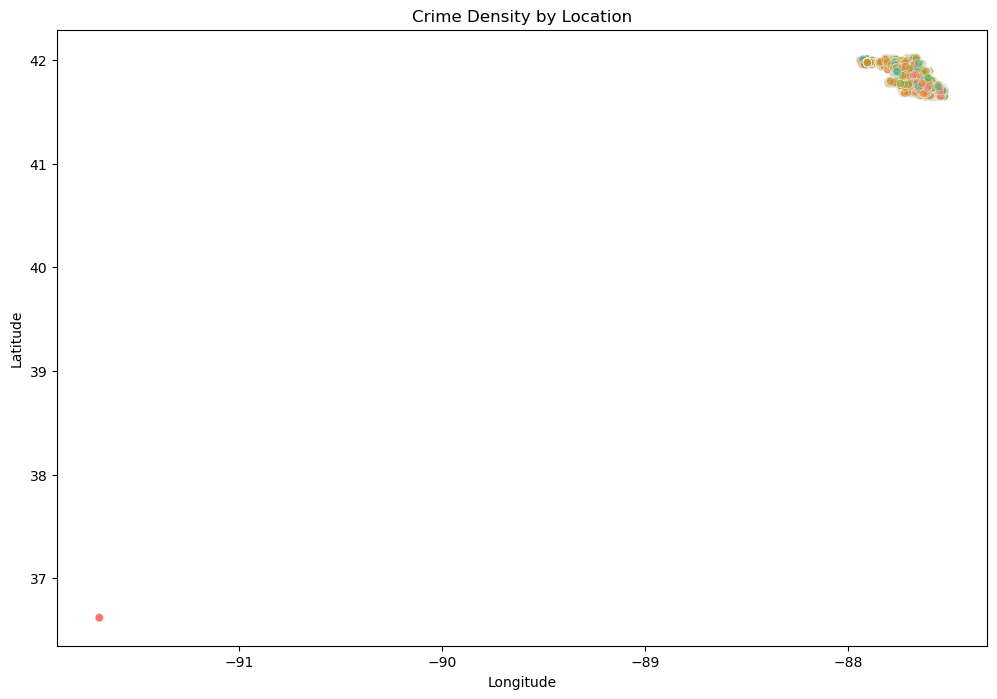

In [17]:
# Geospatial Heatmap for Crime Density
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Longitude', y='Latitude', hue='Primary Type', alpha=0.5, legend=False)
plt.title("Crime Density by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


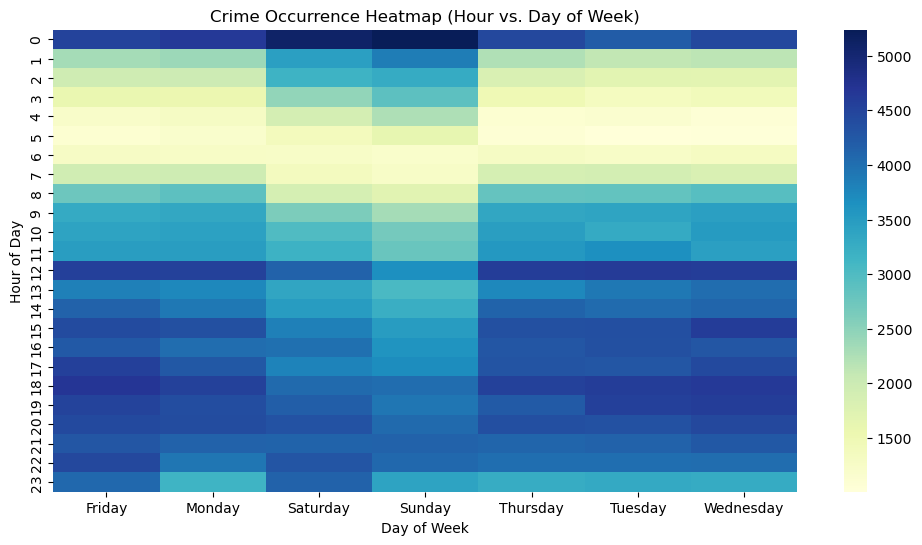

In [18]:
# Hourly crime heatmap
hourly_crime = data.groupby(['Hour', 'DayOfWeek']).size().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_crime, cmap="YlGnBu", annot=False)
plt.title("Crime Occurrence Heatmap (Hour vs. Day of Week)")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.show()


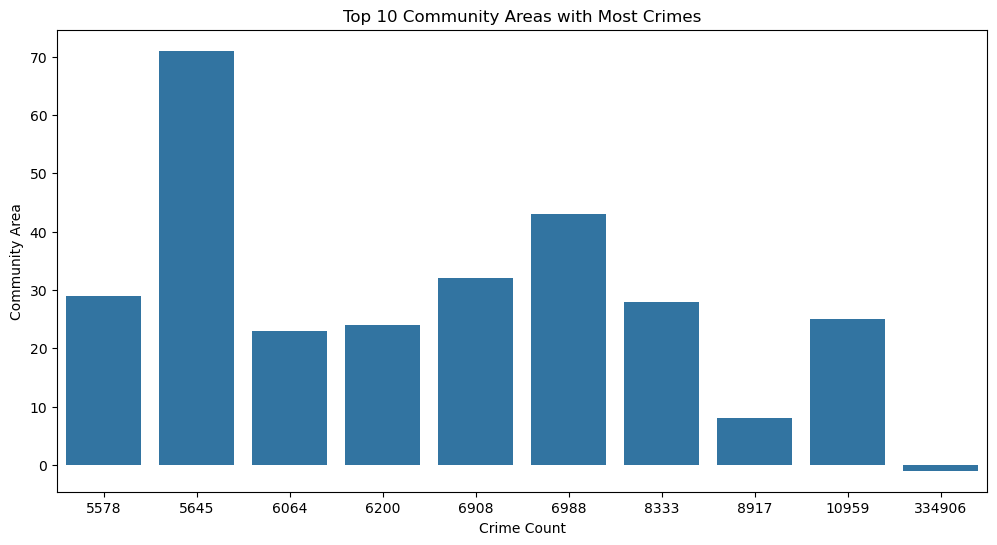

In [19]:
# Crime count by community area
community_crime = data['Community Area'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=community_crime.values, y=community_crime.index)
plt.title("Top 10 Community Areas with Most Crimes")
plt.xlabel("Crime Count")
plt.show()


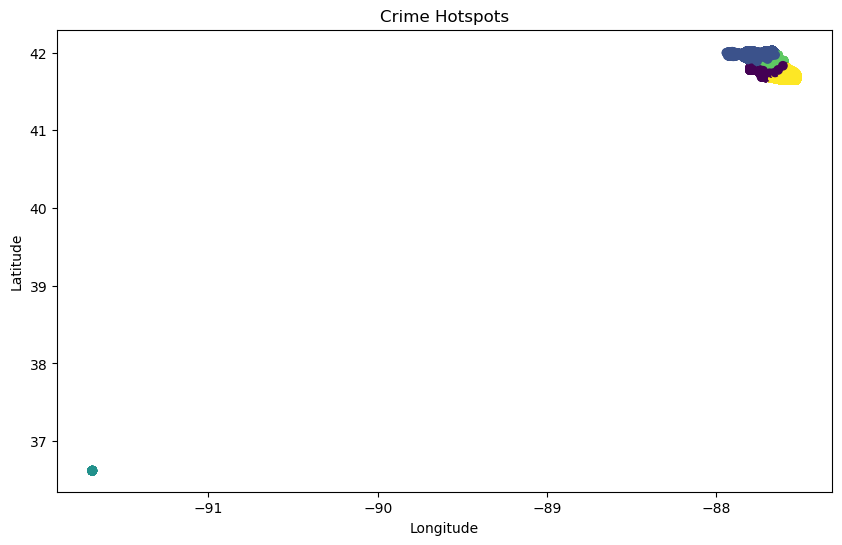

In [21]:
#"Crime Hotspot Identification Using K-Means Clustering"
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select location data
location_data = data[['Latitude', 'Longitude']].dropna()

# Fit K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
location_data['Cluster'] = kmeans.fit_predict(location_data)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(location_data['Longitude'], location_data['Latitude'], c=location_data['Cluster'], cmap='viridis')
plt.title("Crime Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


C:\Users\Hi\AppData\Local\Temp\ipykernel_6540\440049784.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  crime_trends = data.set_index('Date').resample('M')['ID'].count()


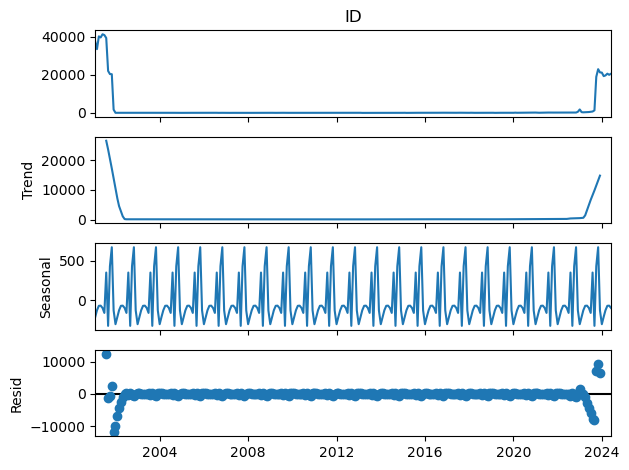

C:\Users\Hi\anaconda4\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2024-06-30    18588.878948
2024-07-31    17903.623076
2024-08-31    18490.986155
2024-09-30    19915.961581
2024-10-31    21575.910292
2024-11-30    22917.875592
2024-12-31    23597.034999
2025-01-31    23539.863839
2025-02-28    22911.942755
2025-03-31    22019.403600
2025-04-30    21187.389813
2025-05-31    20657.181449
Freq: ME, Name: predicted_mean, dtype: float64


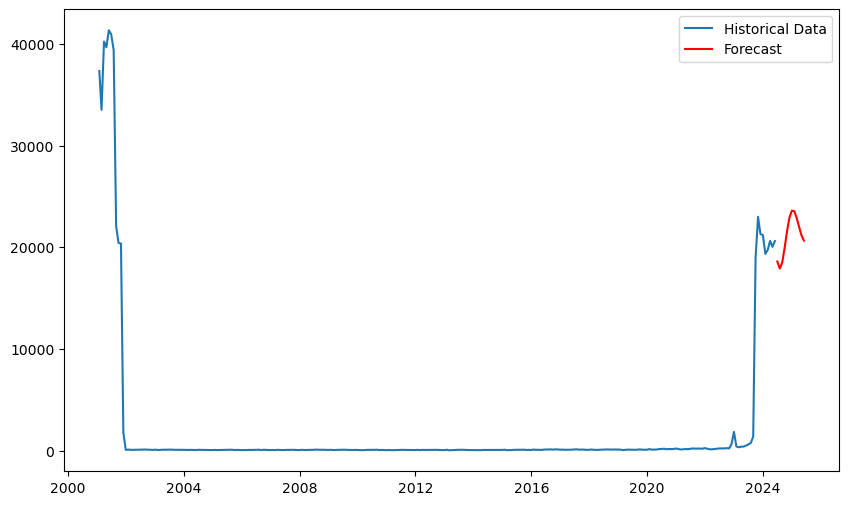

In [22]:
#Crime Trend Analysis and Forecasting Using Time Series Modeling
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Aggregate data by time
crime_trends = data.set_index('Date').resample('M')['ID'].count()

# Decompose the time series
decomposition = seasonal_decompose(crime_trends, model='additive')
decomposition.plot()
plt.show()

# Fit ARIMA model
model = ARIMA(crime_trends, order=(2, 1, 2))  # Adjust order as needed
arima_result = model.fit()

# Forecast
forecast = arima_result.forecast(steps=12)
print(forecast)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(crime_trends, label="Historical Data")
plt.plot(forecast, label="Forecast", color='red')
plt.legend()
plt.show()


In [23]:
#Crime Arrest Prediction Using Random Forest Classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv('crime_data.csv')  # Replace with your dataset path

# Data Cleaning
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Hour'] = df['Date'].dt.hour
df.dropna(subset=['Primary Type', 'Location Description'], inplace=True)

# Feature Encoding
df['Primary Type'] = df['Primary Type'].astype('category').cat.codes
df['Location Description'] = df['Location Description'].astype('category').cat.codes

# Define features and target
features = ['Year', 'Month', 'Hour', 'Primary Type', 'Location Description', 'Domestic']
target = 'Arrest'

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\Hi\AppData\Local\Temp\ipykernel_6540\41764104.py:11: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Accuracy: 0.8623691473452565
              precision    recall  f1-score   support

       False       0.88      0.95      0.91    125022
        True       0.79      0.58      0.67     39476

    accuracy                           0.86    164498
   macro avg       0.84      0.76      0.79    164498
weighted avg       0.86      0.86      0.85    164498



In [28]:
#Crime Count Prediction Using Random Forest Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming `data` is your DataFrame
# Data Cleaning
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = data['Date'].dt.hour
data.dropna(subset=['Primary Type', 'Location Description'], inplace=True)

# Feature Encoding
data['Primary Type'] = data['Primary Type'].astype('category').cat.codes
data['Location Description'] = data['Location Description'].astype('category').cat.codes

# Create 'CrimeCount' by counting the number of crimes per day
data['CrimeCount'] = data.groupby(['Year', 'Month', 'Day'])['Case Number'].transform('count')

# Define features and target
features = ['Year', 'Month', 'Day', 'Hour', 'Primary Type', 'Location Description', 'Domestic']
target = 'CrimeCount'  # The target variable is now CrimeCount

X = data[features]
y = data[target]

# Address class imbalance (optional, depending on your target variable type)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize and train Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 162.39896512551059
